# Smoothness Scores Filtering

Smoothness scores are another metric used to filter down the remaining cases even further. We currently have 33 cases left to filter down now at this stage. 

In [1]:
from steadystate.crm import CellularRegulatoryMechanism as CRM
import numpy as np
import pandas as pd

In [2]:
casesLeft =[1, 3, 5, 11, 13, 15, 16, 18, 22, 24, 26, 28, 30, 57, 59, 61, 79, 96, \
105, 107, 109, 111, 132, 140, 142, 144]
print(len(casesLeft))
crms = []
regulationFrame = pd.read_csv("data/crmdata.csv")
for case in casesLeft:
    wyfilepath = f"data/wy/case{case}.csv"
    wdfilepath = f"data/wd/case{case}.csv"
    crms.append(CRM(case, regulationFrame.iloc[0].to_dict(), wyfilepath, wdfilepath))



26


In [3]:
def sortBySmoothness(crm):
    return crm.getSmoothnessScore()
crms.sort(key=sortBySmoothness)
for c in crms[0:int(np.ceil(len(crms)/2))]:
    print(c.id, c.getSmoothnessScore())

5 2355.341046991705
3 2360.0744962633116
1 2368.6706047928806
18 2386.1958642874793
16 2391.215886556497
13 2400.3323969778803
15 2412.5900559925813
132 2442.0340573624158
79 2649.0513139918367
96 2723.6359213665946
28 2952.323806196433
30 2953.1819794645135
24 2954.3535571295656


Let us take a look at one case that was eliminated - case 96.

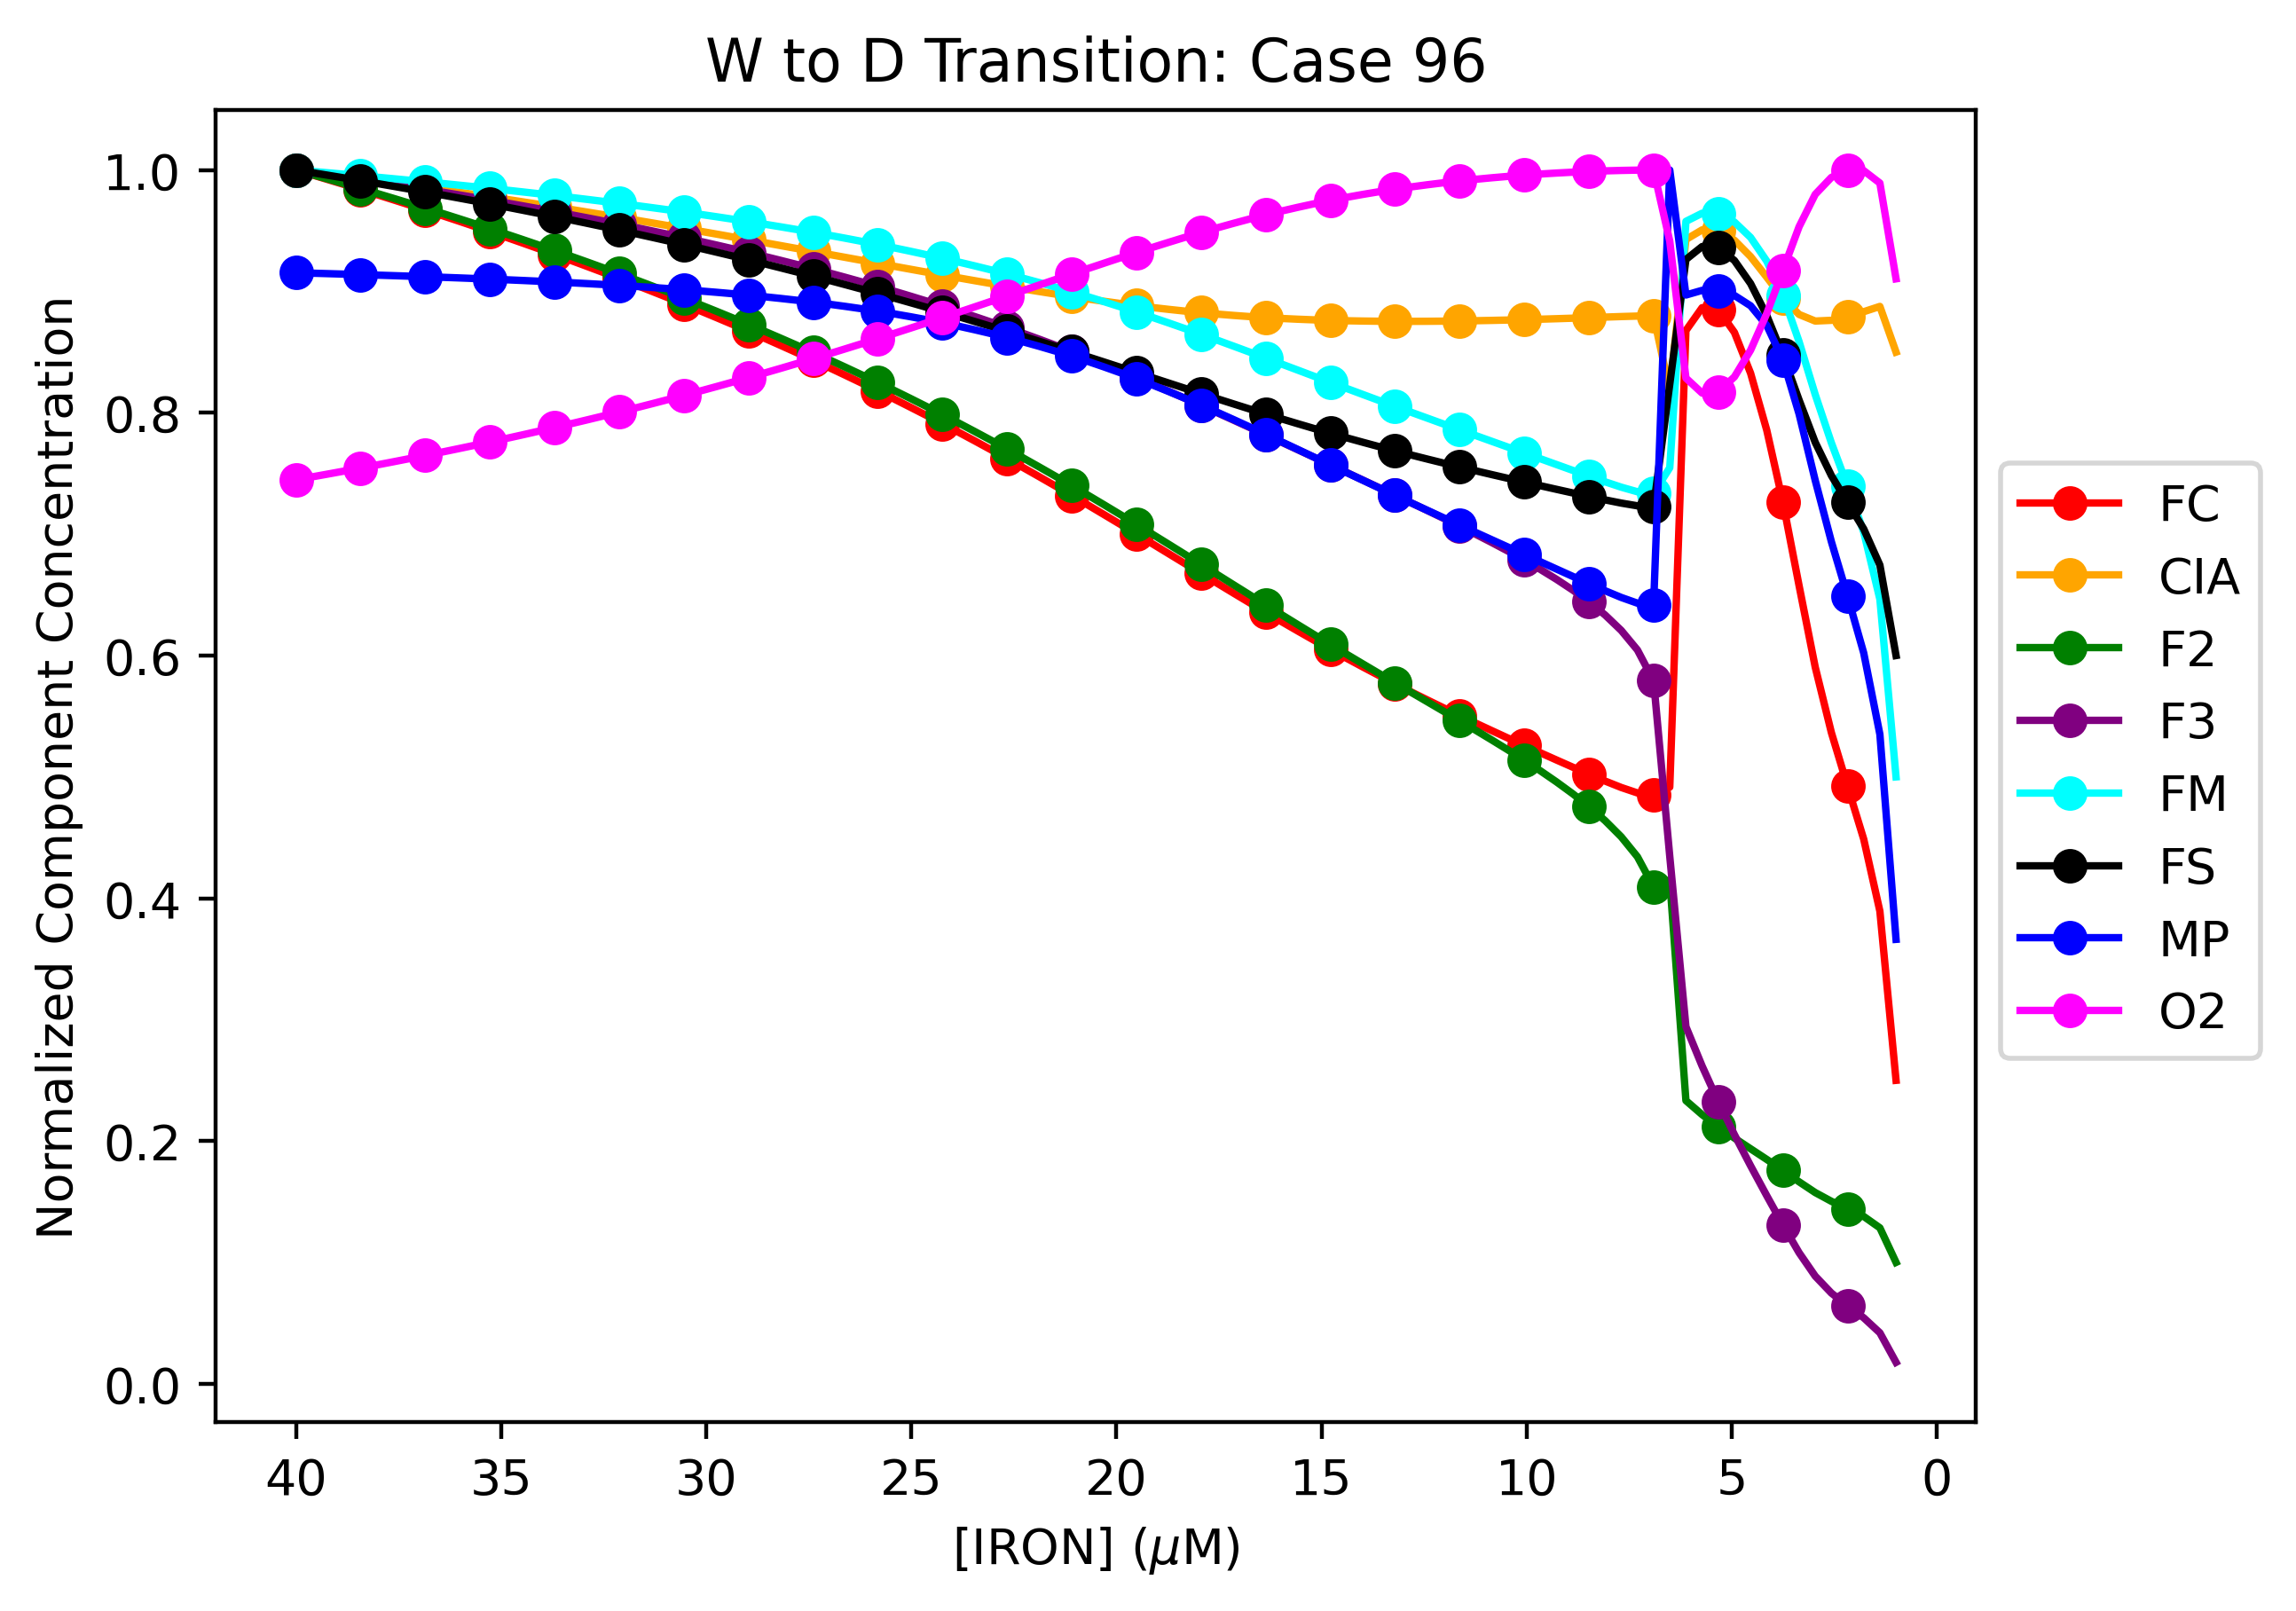

In [4]:
from steadystate.constants import COLOR_MAP, COMPONENTS, IRON
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
failedcrm = crms[9]
data = failedcrm.dstate.data
x = data[IRON].values
for component in COMPONENTS:
    plt.plot(x,data[component]/data[component].max(),color=COLOR_MAP[component],marker='o',markevery=4,label=component)
plt.gca().invert_xaxis()
plt.legend(bbox_to_anchor=(1,0.75))
plt.xlabel("[IRON] ($\mu$M)")
plt.ylabel("Normalized Component Concentration")
plt.title(f"W to D Transition: Case {failedcrm.id}")
plt.show()

FC seems to have a big "spike" towards the end.

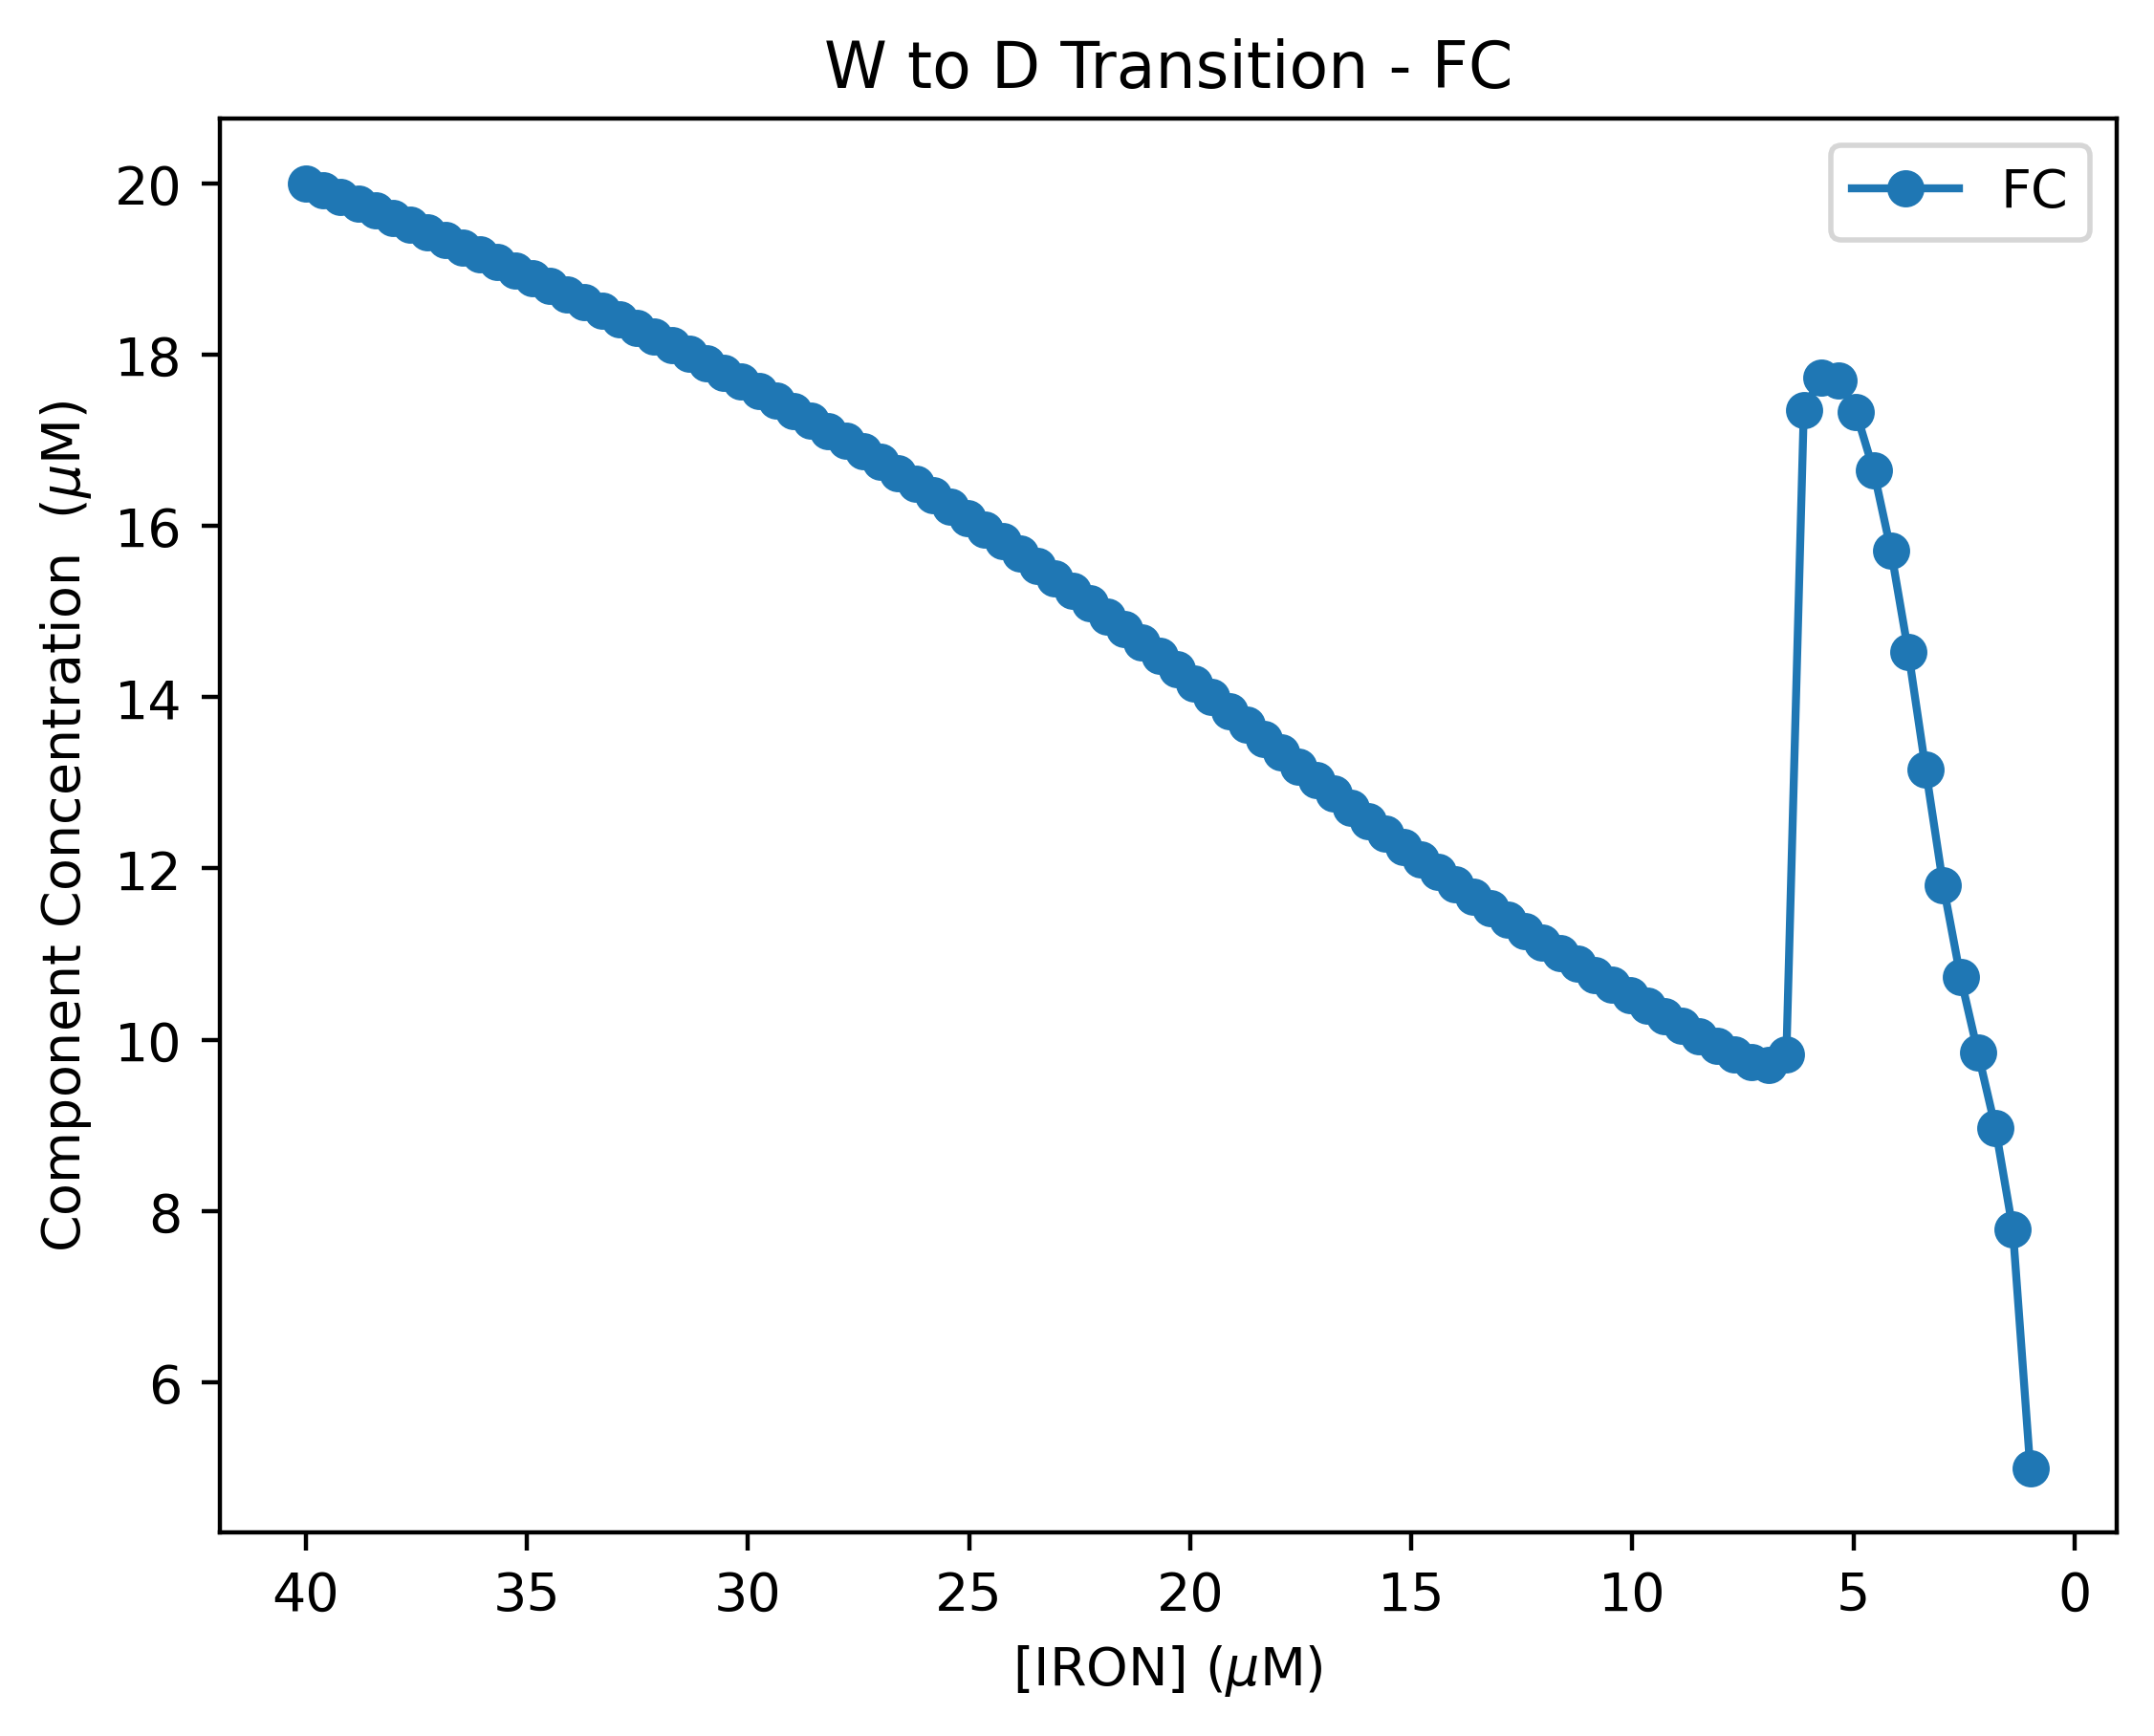

In [5]:
y = failedcrm.dstate.data['FC'].values
plt.plot(x,y,marker='o',label='FC')
plt.title("W to D Transition - FC")
plt.xlabel("[IRON] ($\mu$M)")
plt.gca().invert_xaxis()
plt.ylabel("Component Concentration  ($\mu$M)")
plt.legend()
plt.show()

A majority of this plot is smooth - up until the end where there is a massive jump. 

## Clustering Demo

For this particular example, we just selected the top 3 cases as after the 4th best case and above there is a sharp increase in the scores. The top 3 are fairly clustered together. However, if you had a substantial amount of cases, you could use clustering to determine the cutoff. 

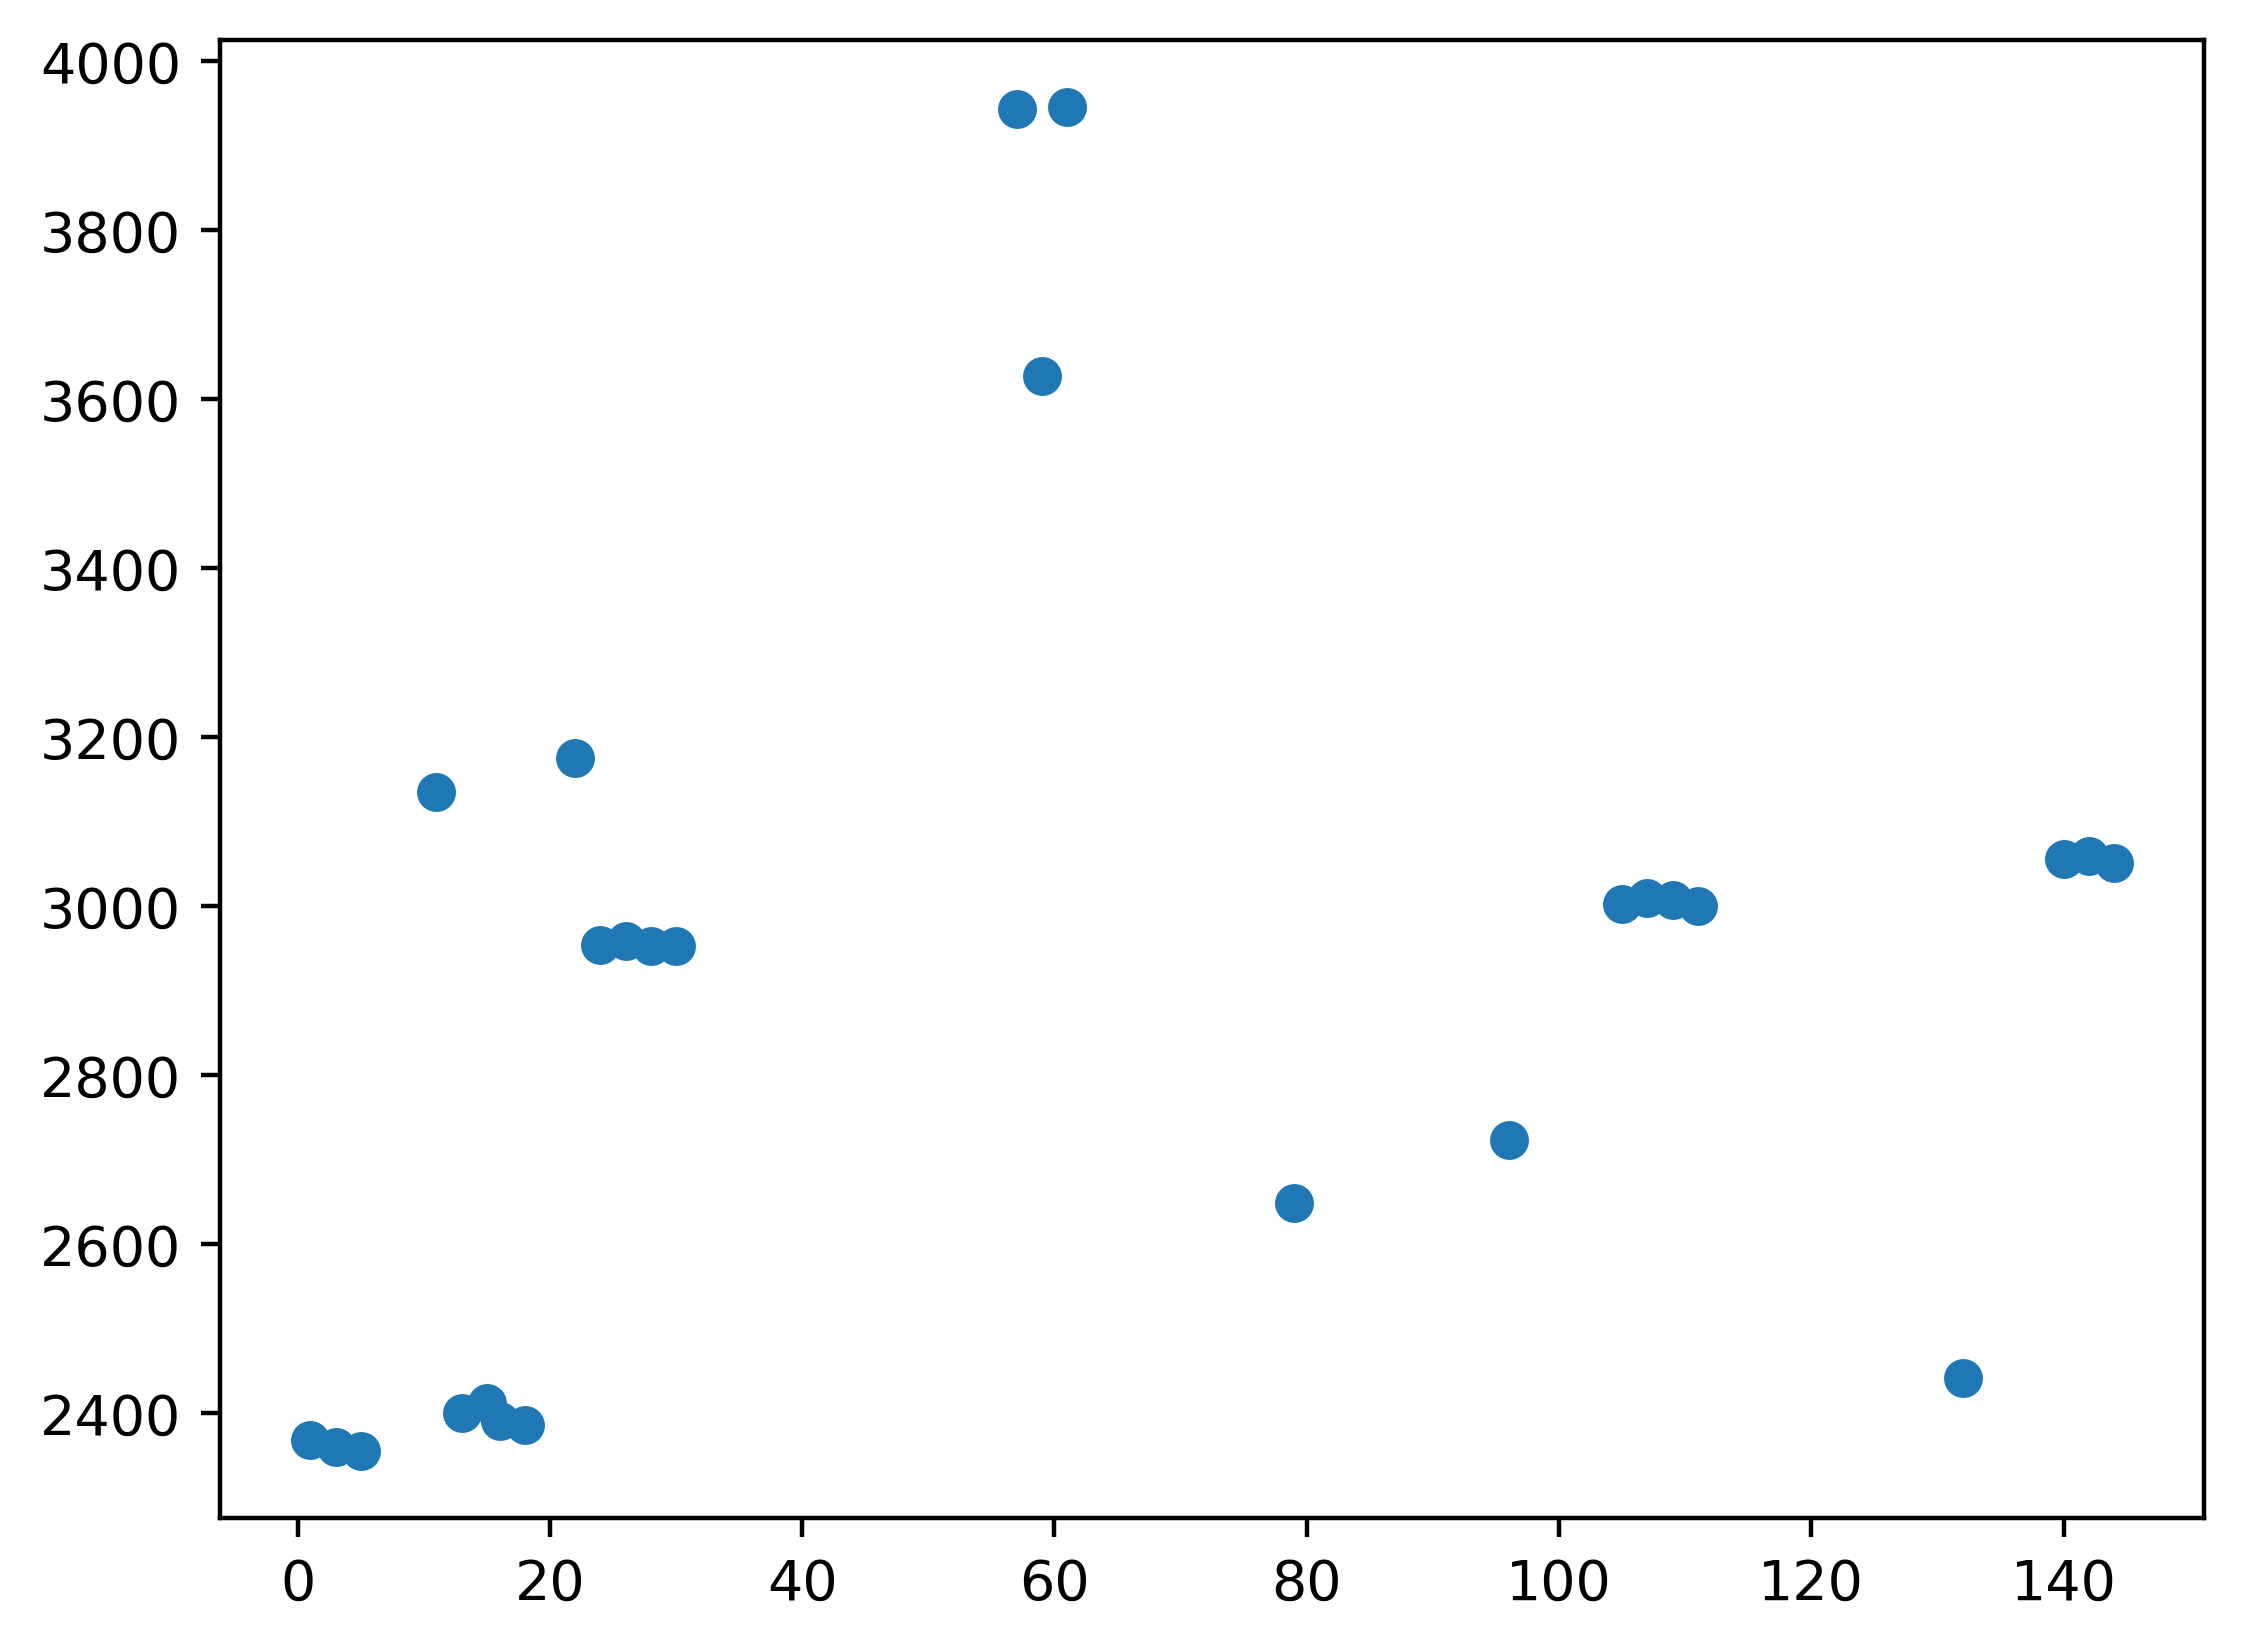

In [6]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
ms = MeanShift(bandwidth=None, bin_seeding=True)
smoothnessScores = [crm.getSmoothnessScore() for crm in crms]
caseIds = [crm.id for crm in crms]
ms.fit(np.reshape(smoothnessScores, (-1,1)))
plt.scatter(caseIds, smoothnessScores)


In [7]:
labels = ms.labels_
clusterCenters = ms.cluster_centers_
uniqueLabels = np.unique(labels)
numOfClusters = len(uniqueLabels)
print("Estimated Clusters:", numOfClusters)
for i in range(len(labels)):
    print(f"Case {crms[i].id}:", crms[i].getSmoothnessScore(), "belongs to cluster",labels[i])

Estimated Clusters: 5
Case 5: 2355.341046991705 belongs to cluster 1
Case 3: 2360.0744962633116 belongs to cluster 1
Case 1: 2368.6706047928806 belongs to cluster 1
Case 18: 2386.1958642874793 belongs to cluster 1
Case 16: 2391.215886556497 belongs to cluster 1
Case 13: 2400.3323969778803 belongs to cluster 1
Case 15: 2412.5900559925813 belongs to cluster 1
Case 132: 2442.0340573624158 belongs to cluster 1
Case 79: 2649.0513139918367 belongs to cluster 3
Case 96: 2723.6359213665946 belongs to cluster 3
Case 28: 2952.323806196433 belongs to cluster 0
Case 30: 2953.1819794645135 belongs to cluster 0
Case 24: 2954.3535571295656 belongs to cluster 0
Case 26: 2959.028318786478 belongs to cluster 0
Case 111: 3000.421099738939 belongs to cluster 0
Case 105: 3002.245145572195 belongs to cluster 0
Case 109: 3006.9065522262927 belongs to cluster 0
Case 107: 3009.1417001806803 belongs to cluster 0
Case 144: 3050.803517777016 belongs to cluster 0
Case 140: 3055.735541883817 belongs to cluster 0
Ca